## **Airbnb (New York City)**
* ÎØ∏Íµ≠ NYC Airbnb Î™©Î°ù(2019)
* ÌîÑÎ°úÏ†ùÌä∏ Î™©Ï†Å: Í∞ÄÍ≤© ÏòàÏ∏°(price)
* Ï†úÍ≥µ Îç∞Ïù¥ÌÑ∞(3Í∞ú): train.csv, test.csv, y_test(ÏµúÏ¢Ö Ï±ÑÏ†êÏö©)
* ÌèâÍ∞Ä Î∞©Ïãù: MSE (ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®/ Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞í Ï∞®Ïù¥ ->Ï†úÍ≥±Ìï¥ ÌèâÍ∑†)

### **1. Baseline**
#### **ÎùºÏù¥Î∏åÎü¨Î¶¨ÏôÄ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞**

In [1]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

### **2. EDA (ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù)**
#### **ÌÉêÏÉâÏ†ÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞**

In [3]:
# Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞
train.shape, test.shape

((39116, 16), (9779, 15))

train dataÏóê target Í∞íÏù¥ ÌïòÎÇò Îçî Ï∂îÍ∞ÄÎêòÏñ¥ ÏûàÎã§.

In [4]:
# Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå
display(train.head(2))
display(test.head(2))

id                                            name   host_id  \
0  14963583          Room in South Harlem near Central Park  94219511   
1   9458704  Large 1BR Apartment, near Times Sq (2nd Floor)  49015331   

  host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0    Gilles           Manhattan          Harlem  40.80167  -73.95781   
1     Iradj           Manhattan  Hell's Kitchen  40.76037  -73.99016   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     70               3                  3  2019-01-01   
1  Entire home/apt    240               2                 64  2019-06-30   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.09                               2                 0  
1               1.68                               2               262

id                                               name   host_id  \
0  30913224  Cozy and Sunny Room Williamsburg, Luxury Building  33771081   
1    971247                   Sunny Artist Live/Work Apartment   5308961   

  host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0      R√©my            Brooklyn     Williamsburg  40.70959  -73.94652   
1     Larry           Manhattan  Upper West Side  40.79368  -73.96487   

         room_type  minimum_nights  number_of_reviews last_review  \
0     Private room               3                  2  2019-05-08   
1  Entire home/apt               3                159  2019-07-03   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.31                               1                 0  
1               2.09                               1               244

In [5]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

**Í≤∞Ï∏°Ïπò ÌôïÏù∏ÌïòÍ∏∞**

In [6]:
# Í≤∞Ï∏°Ïπò(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [7]:
# Í≤∞Ï∏°Ïπò(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

ÎèôÏùºÌïú ÌîºÏ≤òÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

#### **Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÌïòÍ∏∞**

**ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(correlation) ÌôïÏù∏ÌïòÍ∏∞**

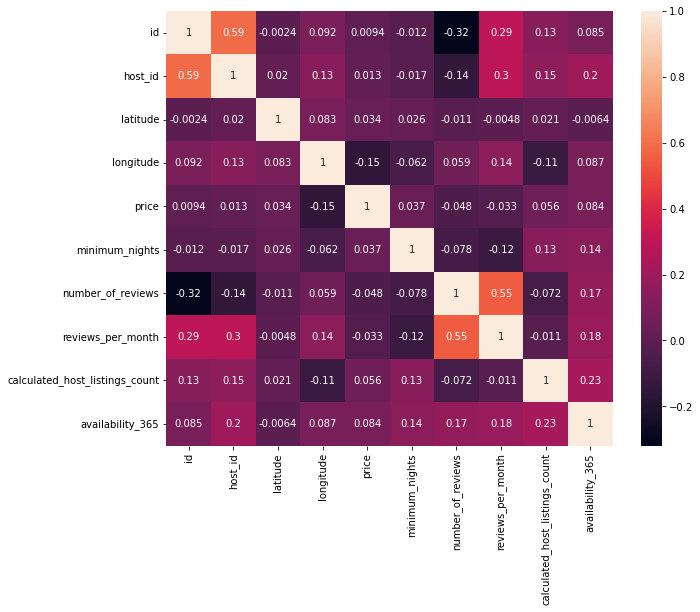

In [8]:
plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True);

ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌëúÎ•º Î≥¥Î©¥ Í∞ÄÍ≤©Í≥º Îã§Î•∏ ÌäπÏÑ± Í∞ÑÏóê Í∞ïÌïú Í¥ÄÍ≥ÑÍ∞Ä ÏóÜÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.

**ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú Î∂ÑÌè¨ ÌååÏïÖÌïòÍ∏∞**

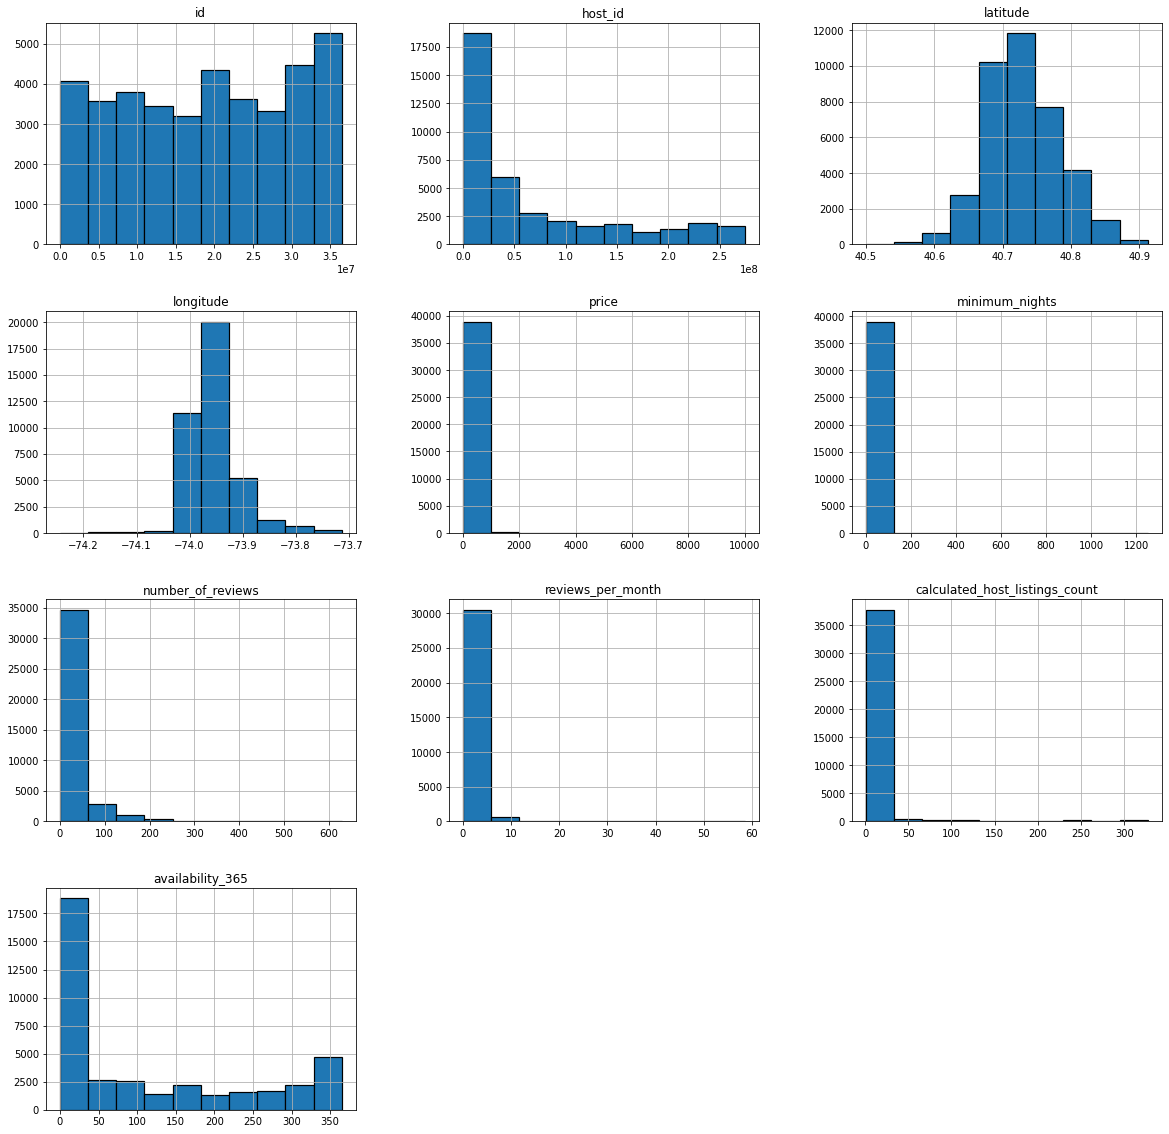

In [9]:
train.hist(edgecolor="black", linewidth=1.2, figsize=(20, 20));

TargetÏù∏ priceÎäî Ï°∞Í∏à Îçî ÌÅ¨Í≤å ÏãúÍ∞ÅÌôîÌï¥ÏÑú ÏûêÏÑ∏ÌïòÍ≤å ÏÇ¥Ìé¥Î≥¥Ïûê!

Text(0.5, 1.0, 'Price Distribution Plot')

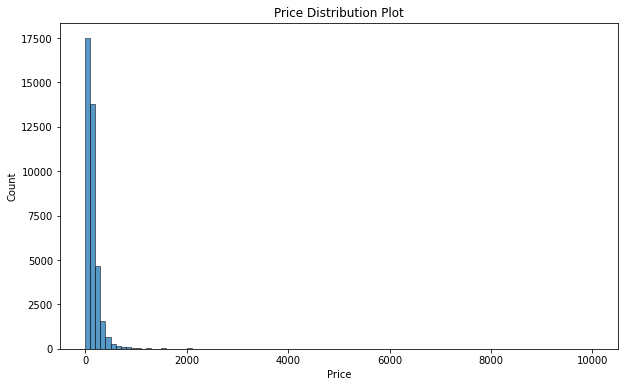

In [10]:
# target(hist)
plt.figure(figsize=(10, 6))
sns.histplot(train['price'], bins=100)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution Plot")

Ï¢åÏ∏°Ïóê ÎßéÏù¥ Î™∞Î†§ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏñ¥ Î°úÍ∑∏ Î≥ÄÌôò(log transformation)ÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Í∏∞Î°ú ÌñàÎã§.

**Î≤îÏ£ºÌòï(categorical) Îç∞Ïù¥ÌÑ∞**

In [11]:
# ÌîºÏ≤ò(neighbourhood_group)
train['neighbourhood_group'].value_counts()

Manhattan        17331
Brooklyn         16081
Queens            4530
Bronx              884
Staten Island      290
Name: neighbourhood_group, dtype: int64

In [12]:
# ÌîºÏ≤ò(room_type)
train['room_type'].value_counts()

Entire home/apt    20299
Private room       17876
Shared room          941
Name: room_type, dtype: int64

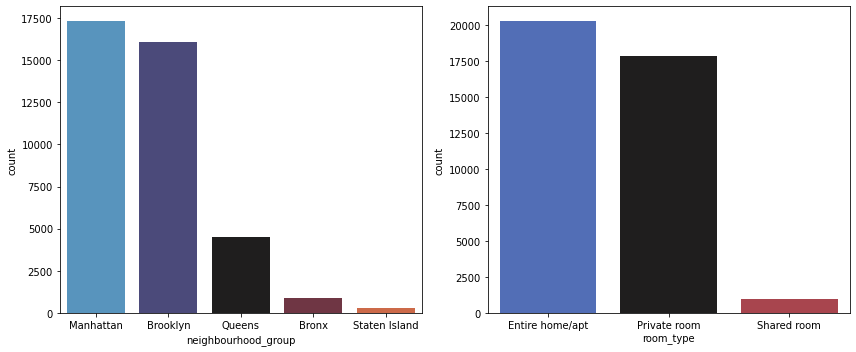

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(ax=axes[0], data=train, x='neighbourhood_group', palette='icefire', order=train['neighbourhood_group'].value_counts().index)
sns.countplot(ax=axes[1], data=train, x='room_type', palette='icefire', order=train['room_type'].value_counts().index)
plt.tight_layout()
plt.show()

ManhattanÍ≥º BrooklynÏóê Í∞ÄÏû• ÎßéÏùÄ ÏÇ¨ÎûåÎì§Ïù¥ ÏòàÏïΩÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏúºÎ©∞, ÎåÄÎ∂ÄÎ∂Ñ Í≥µÏú† Î£∏Î≥¥Îã§Îäî Ïßë Ï†ÑÏ≤¥ÎÇò Í∞úÏù∏ Î∞©ÏùÑ ÏòàÏïΩÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

In [14]:
# ÌîºÏ≤ò(neighbourhood)
train['neighbourhood'].value_counts()

Williamsburg          3099
Bedford-Stuyvesant    2953
Harlem                2114
Bushwick              1981
Hell's Kitchen        1557
                      ... 
Silver Lake              1
Richmondtown             1
Willowbrook              1
New Dorp                 1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

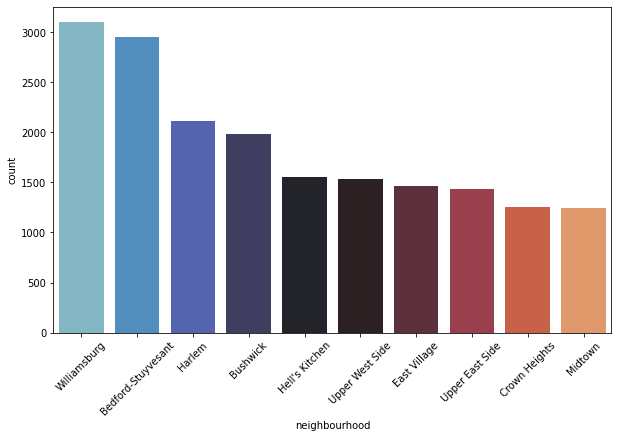

In [15]:
fig, axes = plt.subplots(figsize=(10, 6))
top_neighbourhood = train['neighbourhood'].value_counts().iloc[:10].index
sns.countplot(data=train[train['neighbourhood'].isin(top_neighbourhood)], x='neighbourhood', palette='icefire', order=top_neighbourhood)
plt.xticks(rotation=45)
plt.show()

Williamsburg, BrooklynÏóêÏÑú ÏòàÏïΩÏù¥ Í∞ÄÏû• ÎßéÏù¥ Î∞úÏÉùÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

Ïù¥Î≤àÏóêÎäî ÏúÑÎèÑ(latitude)ÏôÄ Í≤ΩÎèÑ(longitude) Í∞íÏùÑ ÏÇ∞Ï†êÎèÑÎ°ú ÎÇòÌÉÄÎÇ¥Ïñ¥ Í∞Å ÏßÄÏó≠Î≥Ñ Î∂ÑÌè¨Î•º ÏÇ¥Ìé¥Î≥¥Ïûê.

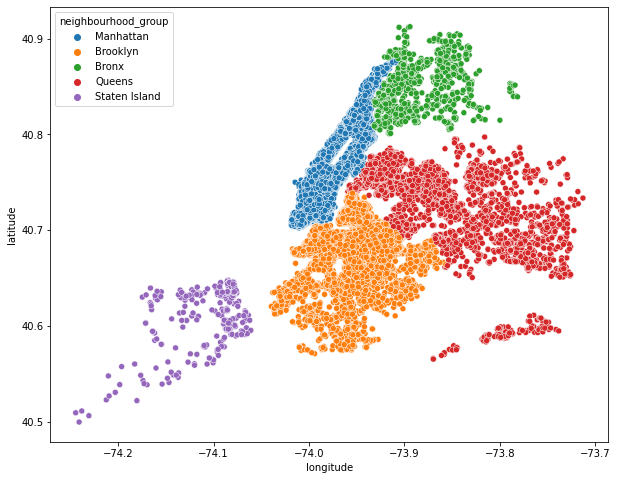

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=train)
plt.show()

### **3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**
#### **Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Í≥† ÌåêÎã®ÌïòÏó¨ Í≤∞Ï∏°Ïπò Î∞è Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨**

Î°úÍ∑∏ Î≥ÄÌôòÏùÑ ÏßÑÌñâÌïòÍ∏∞ Ï†ÑÏóê, describe()Ìï®ÏàòÎ•º ÌÜµÌï¥ ÏµúÏÜüÍ∞íÏùÑ ÌôïÏù∏Ìï¥Ï§ÄÎã§. (Î°úÍ∑∏ Ìï®ÏàòÎäî 0 Ïù¥ÌïòÏùò Í∞íÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§)

In [17]:
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [18]:
# Î°úÍ∑∏ Î≥ÄÌôò
train['price'] = np.log1p(train['price'])
train['price']

0        4.262680
1        5.484797
2        5.017280
3        4.454347
4        3.806662
           ...   
39111    5.225747
39112    3.931826
39113    4.795791
39114    5.111988
39115    5.303305
Name: price, Length: 39116, dtype: float64

Text(0.5, 1.0, 'Price Distribution Plot')

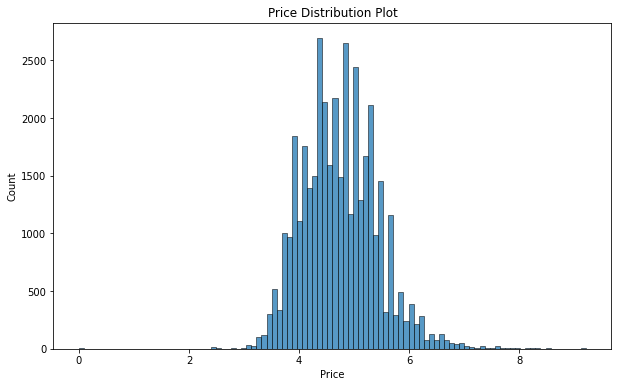

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(train['price'], bins=100)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution Plot")

In [20]:
# Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú
train = train.drop(['id', 'host_name', 'name', 'last_review'], axis=1)
test = test.drop(['id', 'host_name', 'name', 'last_review'], axis=1)

In [21]:
# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [22]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
train.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [23]:
# Í∞ÄÍ≤© Í∞í Î≥µÏÇ¨
target = train['price']
train = train.drop('price', axis=1)

#### **ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ**

In [24]:
# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ÏôÄ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()

n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()

In [25]:
n_train.describe()

host_id      latitude     longitude  minimum_nights  \
count  3.911600e+04  39116.000000  39116.000000    39116.000000   
mean   6.774143e+07     40.728848    -73.952125        6.990720   
std    7.881383e+07      0.054499      0.046354       20.310323   
min    2.438000e+03     40.499790    -74.244420        1.000000   
25%    7.834978e+06     40.690038    -73.983190        1.000000   
50%    3.070949e+07     40.723000    -73.955740        2.000000   
75%    1.074344e+08     40.762943    -73.936338        5.000000   
max    2.743213e+08     40.912340    -73.712990     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       39116.000000       39116.000000                    39116.000000   
mean           23.272855           1.091963                        7.090756   
std            44.589170           1.600772                       32.661136   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            23.000000           1.590000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      39116.000000  
mean         112.980826  
std          131.674306  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          228.000000  
max          365.000000

In [26]:
# ÏàòÏπòÌòï Î≥ÄÏàò
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
cols = [
        'host_id',
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

display(n_train.head(1))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(1))

host_id  latitude  longitude  minimum_nights  number_of_reviews  \
0  94219511  40.80167  -73.95781               3                  3   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.09                               2                 0

host_id  latitude  longitude  minimum_nights  number_of_reviews  \
0  0.637654  1.079076  -0.044181            0.25          -0.090909   

   reviews_per_month  calculated_host_listings_count  availability_365  
0          -0.180645                             1.0         -0.197368

In [27]:
# Î≤îÏ£ºÌòï Î≥ÄÏàò
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type'
        ]

display(c_train.head(1))
for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])
display(c_train.head(1))

neighbourhood_group neighbourhood     room_type
0           Manhattan        Harlem  Private room

neighbourhood_group  neighbourhood  room_type
0                    2             94          1

In [28]:
# Î∂ÑÎ¶¨Ìïú Îç∞Ïù¥ÌÑ∞ Îã§Ïãú Ìï©Ïπ®
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
print(train.shape, test.shape)
train.head()

(39116, 11) (9779, 11)


host_id  latitude  longitude  minimum_nights  number_of_reviews  \
0  0.637654  1.079076  -0.044181            0.25          -0.090909   
1  0.183795  0.512585  -0.734646            0.00           2.681818   
2 -0.303912  0.096153  -1.064618           14.50          -0.181818   
3 -0.272411 -0.435087   0.410010            0.50          10.636364   
4 -0.183075 -0.466497   0.004055            6.50          -0.227273   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0          -0.180645                             1.0         -0.197368   
1           0.845161                             1.0          0.951754   
2          -0.109677                             0.0         -0.197368   
3           1.625806                             1.0         -0.192982   
4          -0.238710                             0.0         -0.197368   

   neighbourhood_group  neighbourhood  room_type  
0                    2             94          1  
1                    2             95          0  
2                    2            209          0  
3                    1             13          0  
4                    1             13          1

### **4. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨**
#### **Train Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ(ÌõàÎ†®), Validation(Í≤ÄÏ¶ùÏö©) Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°**

In [29]:
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

### **5. Î®∏Ïã†Îü¨Îãù**

XGBoost Î™®Îç∏Ïù¥ Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏïÑ Ìï¥Îãπ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞Î°ú ÌñàÎã§.

In [30]:
# Xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor(max_depth=10,
                     learning_rate=0.02,
                     n_estimators=500,
                     random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


22284.670456832002

### **6. Ï±ÑÏ†ê**

In [31]:
# test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test)

pred = np.expm1(pred)
mean_squared_error(y_test, pred)

42778.1334111504

---

### **ÌîÑÎ°úÏ†ùÌä∏ ÌöåÍ≥†**

Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Îäî Ïú†ÎÇúÌûà ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î†∏Îçò Í≤É Í∞ôÎã§. Ìï¥Îãπ ÎÖ∏ÎìúÏóêÏÑú Ï†úÍ≥µÎêú ÏÑ±Îä•Ìñ•ÏÉÅ Tip ÏòÅÏÉÅÏùÑ Ïù¥ÎØ∏ Î≥¥Í≥† ÎÇòÏÑú ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÍ≤å ÎêòÏñ¥ ÏßÅÏ†ë ÏÉùÍ∞ÅÌï¥Î≥º Í∏∞ÌöåÎ•º ÎÇ†Î¶∞ Í≤É Í∞ôÏïÑ ÏïÑÏâ¨Ïö¥ ÎßàÏùåÎèÑ Îì§ÏóàÎäîÎç∞ ÏòÅÏÉÅÏóêÏÑú ÎÇòÏò® Ï†êÏàòÎ≥¥Îã§ ÎÇÆÏùÄ Ï†êÏàòÎ•º ÎèÑÏ∂úÌï¥ÎÇ∏Îã§Îäî Í±¥ ÏÉùÍ∞ÅÎ≥¥Îã§ Ïâ¨Ïö¥ ÏùºÏù¥ ÏïÑÎãàÏóàÎã§. Í≥†Íµ¨Îßà Î∞±Í∞ú Î®πÏùÄ ÎäêÎÇåÏù¥Îã§,,, ÏÇ¨Ïù¥Îã§Í∞Ä Ï†àÏã§ÌïòÎã§ üç†x100

**ÎÇ¥Í∞Ä ÏãúÎèÑÌï¥Î≥∏ Í≤ÉÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÎã§.**
1. Í≤∞Ï∏°Ïπò ÏÇ≠Ï†ú
2. Ï¢åÏ∏°ÏúºÎ°ú Î™∞Î†§ÏûàÎäî ÌîºÏ≤ò Î°úÍ∑∏ Î≥ÄÌôò
3. ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏïΩÌïòÎã§Í≥† ÏÉùÍ∞ÅÌïòÎäî ÌîºÏ≤ò Ï†úÍ±∞
4. test_size, random_state Î≥ÄÍ≤Ω
5. Îã§Î•∏ Î™®Îç∏ ÏÇ¨Ïö© (LightGBM, CatBoost)
6. Ï†ïÍ∑úÌôî ÎåÄÏã† ÌëúÏ§ÄÌôî ÏßÑÌñâ (MinMaxScaler -> StandardScaler/RobustScaler)
7. Îã§Î•∏ Ïù∏ÏΩîÎî© Î∞©Ïãù ÏÇ¨Ïö© (Label -> One-hot/dummies)
8. XGBoost ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î≥ÄÍ≤Ω (Randomized Search)

1, 2, 3, 4, 7Î≤à -> ÏÑ±Îä•Ïù¥ Îçî Ïïà Ï¢ãÏïÑÏßê (MSE Ï†êÏàòÍ∞Ä ÎÜíÏïÑÏ°åÎã§)
<br>5, 6Î≤à -> ÏÑ±Îä•Ïóê Í±∞Ïùò Ï∞®Ïù¥Í∞Ä ÏóÜÏùå
<br>8Î≤à -> ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Ïò§Îûò Í±∏Î¶º

ÏõêÌï´(One-hot) Ïù∏ÏΩîÎî©ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÏÑ±Îä•Ïù¥ Îçî Ï¢ãÏïÑÏßà Ï§Ñ ÏïåÏïòÎäîÎç∞ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÌîºÏ≤ò ÏàòÍ∞Ä Í∏âÍ≤©Ìûà ÎäòÏñ¥ÎÇòÍ≤å ÎêòÎ©¥ÏÑú ÏïÑÎßà Í≥ºÏ†ÅÌï© Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌï¥ Î™®Îç∏ ÏÑ±Îä•Ïù¥ Ï†ÄÌïòÎêú Í±¥ ÏïÑÎãêÍπå Ïã∂Îã§. ÎòêÌïú Í∑∏Î¶¨Îìú ÏÑúÏπò(Grid Search)Î≥¥Îã§ Îπ†Î•¥Í≥† Ìö®Ïú®Ï†ÅÏù∏ Î∞©Î≤ïÏúºÎ°ú ÏïåÎ†§ÏßÑ ÎûúÎç§ ÏÑúÏπò(Randomized Search)Î•º Ïù¥Ïö©Ìï¥ÏÑú ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÏïÑ Î≥ÄÍ≤ΩÏùÑ ÏãúÎèÑÌï¥Î¥§ÏßÄÎßå, Ïù¥ Ïó≠Ïãú ÏµúÏ¢Ö MSE Ï†êÏàòÏóêÎäî ÌÅ∞ ÎèÑÏõÄÏù¥ ÎêòÏßÄ Î™ª ÌïòÏó¨ Îß§Ïö∞ Ïã§ÎßùÏä§Îü¨Ïõ†Îã§. ÏõêÌï´ Ïù∏ÏΩîÎî©Í≥º ÎûúÎç§ ÏÑúÏπò Îëò Îã§ LMS ÌÅ¥ÎùºÏö∞ÎìúÏóêÏÑúÎäî ÎÑàÎ¨¥ Ïò§Îûò Í±∏Î†§ Î°úÏª¨ÏóêÏÑú Ïã§ÌñâÏùÑ Ìï† Ïàò Î∞ñÏóê ÏóÜÏóàÎã§. ÎπÑÎ°ù Ï†êÏàòÏóêÎäî ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÏïòÏßÄÎßå, ÎçïÎ∂ÑÏóê XGBoostÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÏóêÎäî Ïñ¥Îñ§ Í≤ÉÎì§Ïù¥ ÏûàÎäîÏßÄ ÏïåÍ≤å ÎêòÏóàÍ≥† Ïù¥Í≤ÉÏ†ÄÍ≤É ÎßéÏù¥ ÏãúÎèÑÌï¥Î≥¥Î©¥ÏÑú ÏßÄÍ∏àÍπåÏßÄ Î∞∞Ïö¥ Í≤ÉÎì§ÏùÑ Î≥µÏäµÌï¥Î≥º Ïàò ÏûàÎäî Ï¢ãÏùÄ Í∏∞ÌöåÏòÄÎçò Í≤É Í∞ôÎã§. ÏùºÎã® ÌîºÏ≤òÎì§ Í∞ÑÏóê Í∞ïÌïú Í¥ÄÍ≥ÑÍ∞Ä Î≥¥Ïù¥ÏßÄ ÏïäÏïÑ ÌîºÏ≤òÎì§ Í∞ÑÏùò ÏÉÅÌò∏ÏûëÏö©ÏùÑ ÌååÏïÖÌïòÎäî Îç∞Ïóê Ïñ¥Î†§ÏõÄÏù¥ ÏûàÏóàÍ≥† ÌïòÎÇòÌïòÎÇò ÏãúÍ∞ÅÌôîÎ•º ÏßÑÌñâÌï¥Î≥¥ÏïòÏßÄÎßå ÏïÑÏßÅÍπåÏßÄÎäî Ìï¥Í≤∞Ï±ÖÏùÑ ÎèÑÏ∂úÌïòÎäî Î∂ÄÎ∂ÑÏóê ÏûàÏñ¥ Ïñ¥Î†§ÏõÄÏù¥ ÏûàÎäî Í≤É Í∞ôÏïÑ ÎßéÏùÄ Ïã§ÏäµÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î¨∏Ìï¥Î†•ÏùÑ ÌÇ§ÏõåÏïºÍ≤†Îã§Îäî ÏÉùÍ∞ÅÏù¥ Í∞ïÌïòÍ≤å Îì§ÏóàÎã§. Í∑∏Î¶¨Í≥† Îã§Ïùå ÌîÑÎ°úÏ†ùÌä∏Î∂ÄÌÑ∞Îäî Î¨¥Ï°∞Í±¥ Î°úÏª¨ ÌôòÍ≤ΩÏóêÏÑú Ìï¥ÏïºÍ≤†Îã§!

#### **ÏÉàÎ°ú ÏïåÍ≤å Îêú Í≤É!**
* display(): Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ìëú ÌòïÏãùÏúºÎ°ú ÌëúÏãú
* np.expm1(): Í∞Å ÏöîÏÜåÏóê ÏûêÏó∞ÏÉÅÏàòÎ•º Î∞ëÏúºÎ°ú ÌïòÎäî ÏßÄÏàòÌï®ÏàòÎ•º Ï†ÅÏö©Ìïú Îí§ 1ÏùÑ Î∫Ä Í≤É
* bins: ÌûàÏä§ÌÜ†Í∑∏Îû®Ïùò Í∞ÄÎ°úÏ∂ï Íµ¨Í∞ÑÏùò Í∞úÏàòÎ•º ÏßÄÏ†ï
* palette: seabornÏóêÏÑú ÏÉâÏÉÅ Ï°∞Ìï©ÏùÑ ÏßÄÏ†ïÌï† Îïå ÏÇ¨Ïö© (Í∏∞Î≥∏ ÌåîÎ†àÌä∏Îäî Ï¥ù 6Í∞ÄÏßÄ ÏÉâÏÉÅ Ï†úÍ≥µ)
* tight_layout(): axes ÏÇ¨Ïù¥ Í∞ÑÍ≤©ÏùÑ Ï†ÅÏ†àÌïòÍ≤å Ï°∞Ï†ï

**transform()Í≥º fit_transform()Ïùò Ï∞®Ïù¥Îäî Î¨¥ÏóáÏùºÍπå?** ü§î
* transform(): ÌïôÏäµÎêú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌïòÎäî Ïó≠Ìï†ÏùÑ ÌïúÎã§.
* fit_transform(): Î™®Îç∏Ïóê Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÌïòÍ≥†, Î≥ÄÌôòÌïòÎäî Ïó≠Ìï†ÏùÑ ÌïúÎã§.

Î™®Îç∏ÏùÄ train Îç∞Ïù¥ÌÑ∞Ïóê ÏûàÎäî mean(ÌèâÍ∑†)Í≥º variance(Î∂ÑÏÇ∞)Î•º ÌïôÏäµÌïòÍ≤å ÎêòÎäîÎç∞ Ïù¥Î†áÍ≤å ÌïôÏäµÎêú Scaler()Ïùò ÌååÎùºÎØ∏ÌÑ∞Îäî test Îç∞Ïù¥ÌÑ∞Î•º scaleÌïòÎäîÎç∞ ÏÇ¨Ïö©ÎêúÎã§. Í∑∏Îü∞Îç∞ fit_transformÏùÑ test Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ Ï†ÅÏö©ÌïòÍ≤å ÎêúÎã§Î©¥ test Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ ÏÉàÎ°úÏö¥ ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ Í∞íÏùÑ ÏñªÍ≤å ÎêòÏñ¥ ÌïôÏäµÏùÑ ÌïòÍ≤å ÎêòÎØÄÎ°ú fit_transformÏùÑ test Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ ÌïòÍ≤å ÎêúÎã§Î©¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† Ïàò ÏóÜÍ≤å ÎêúÎã§.

#### **Ï∞∏Í≥†Ìïú Î†àÌçºÎü∞Ïä§**
<br>XGboost Ï£ºÏöî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ (with ÌååÏù¥Ïç¨) https://zzinnam.tistory.com/entry/XGboost-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC
<br>XGBoost ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï(ÌäúÎãù) https://zzinnam.tistory.com/entry/XGBoost-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%EC%A1%B0%EC%A0%95%ED%8A%9C%EB%8B%9D
<br>Îî•Îü¨Îãù Î™®Îç∏ ÏÑ±Îä• Í∞úÏÑ†ÌïòÎäî Î≤ï (Ï∫êÍ∏Ä Tip!) https://facerain.club/improve-dl-performance/
<br>8 Ways to Improve Accuracy of Machine Learning Models (Updated 2023) https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/
<br>New York City Airbnb Open Data https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
<br>[scikit-learn] transform()Í≥º fit_transform()Ïùò Ï∞®Ïù¥Îäî Î¨¥ÏóáÏùºÍπå? https://deepinsight.tistory.com/165